# **Download Data**
- Dữ liệu phục vụ cho bài toán Text Classification và Machine Translation

In [ ]:
!gdown 1iYGB705res6ENM6HnN-_DypLe9wmNE2f

Downloading...
From: https://drive.google.com/uc?id=1iYGB705res6ENM6HnN-_DypLe9wmNE2f
To: /content/Domain_specific_EVCorpus_Done.zip
100% 5.37M/5.37M [00:00<00:00, 126MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/Domain_specific_EVCorpus_Done.zip"

with ZipFile(file_name,'r') as Zip:
  Zip.extractall()
  print('Done')

Done


In [ ]:
%cd /content/Domain_specific_EVCorpus_Done

/content/Domain_specific_EVCorpus_Done


In [ ]:
import os

data = []
en_data = []

for folder in os.listdir():
  files = os.listdir(folder)
  files.sort()
  for file in files:
    with open(folder + '/' + file, 'r') as f:
      lines = f.readlines()
      if file.split('.')[2] == 'vn':
        for line in lines:
          data.append([file.split('.')[1], line.replace('\n', ''), folder])
      else:
        for line in lines:
          en_data.append(line.replace('\n', ''))

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns = ['data_type', 'vn_data', 'label'])
df['en_data'] = en_data
df

,data_type,vn_data,label,en_data
0,dev,( cũng gọi là bộ thanh nẹp ) một thanh nẹp châ...,Medicine,( also called caliper splint ) a leg splint th...
1,dev,( còn gọi là bùng nổ ) một phương pháp dùng ch...,Medicine,( also called implosion ) a method of treating...
2,dev,( sự hướng về ngoại giới ) một nét nhân cách b...,Medicine,( extraversion ) an enduring personality trait...
3,dev,( u xơ tử cung ) một khối u lành của một mô cơ...,Medicine,"( fibromyoma , uterine fibroma ) a bening tumo..."
4,dev,( từ cũ ) bất cứ dạng điều trị y học nào có dò...,Medicine,( formerly ) any form of medical treatment usi...
...,...,...,...,...
68336,train,Viết bằng bút lông và ăn bằng đũa là những tập...,Science,Writing with a brush and eating with chopstick...
68337,train,"Xerxes , vị vua có uy quyền ở Ba Tư xua quân b...",Science,"Xerxes , the powerful king of Persia , sent hi..."
68338,train,Công viên quốc gia Yellowstone có hàng trăm su...,Science,Yellowstone National Park has hundreds of hot ...
68339,train,"Trai trẻ học đánh box , đấu vật và chạy đua để...",Science,"Young men practiced boxing , wrestling , and r..."


In [ ]:
df.info() # Kiểm tra dữ liệu 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68341 entries, 0 to 68340
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data_type  68341 non-null  object
 1   vn_data    68341 non-null  object
 2   label      68341 non-null  object
 3   en_data    68341 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


# **Text Classification**
- Phân loại văn bản với các chủ đề: Computer, Electronic, Medicine, Science

In [ ]:
clf_data = df.copy()
clf_data.drop('en_data', axis = 1, inplace = True)
clf_data

,data_type,vn_data,label
0,dev,( cũng gọi là bộ thanh nẹp ) một thanh nẹp châ...,Medicine
1,dev,( còn gọi là bùng nổ ) một phương pháp dùng ch...,Medicine
2,dev,( sự hướng về ngoại giới ) một nét nhân cách b...,Medicine
3,dev,( u xơ tử cung ) một khối u lành của một mô cơ...,Medicine
4,dev,( từ cũ ) bất cứ dạng điều trị y học nào có dò...,Medicine
...,...,...,...
68336,train,Viết bằng bút lông và ăn bằng đũa là những tập...,Science
68337,train,"Xerxes , vị vua có uy quyền ở Ba Tư xua quân b...",Science
68338,train,Công viên quốc gia Yellowstone có hàng trăm su...,Science
68339,train,"Trai trẻ học đánh box , đấu vật và chạy đua để...",Science


## Preprocessing
- Chuẩn hóa unicode
- Chuẩn hóa dấu câu tiếng Việt
- Tách từ tiếng Việt
- Chuyển chữ viết thường
- Chuẩn hóa câu



In [ ]:
!pip install underthesea # Vietnamese NLP Toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.3/591.3 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.3 MB/s eta 0:00:00


In [ ]:
import regex as re
def chuan_hoa_cau(text):
	text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
	text = re.sub(r'\s+', ' ', text).strip()
	return text

In [ ]:
import gensim
import unicodedata
from underthesea import text_normalize, word_tokenize

data_pre = list()
for sentence in clf_data['vn_data']:
  sentence = gensim.utils.simple_preprocess(sentence)
  sentence = ' '.join(sentence)
  sentence = unicodedata.normalize('NFC', sentence)
  sentence = text_normalize(sentence)
  sentence = word_tokenize(sentence, format="text")
  sentence = sentence.lower()
  sentence = chuan_hoa_cau(sentence)
  data_pre.append(sentence)

In [ ]:
clf_data['vn_data'] = data_pre
clf_data

,data_type,vn_data,label
0,dev,cũng gọi_là bộ thanh nẹp một thanh nẹp chân gồ...,Medicine
1,dev,còn gọi_là bùng_nổ một phương_pháp dùng chữa á...,Medicine
2,dev,sự hướng về ngoại_giới một nét nhân_cách bền_v...,Medicine
3,dev,xơ tử_cung một khối lành của một mô cơ và sợi ...,Medicine
4,dev,từ cũ bất_cứ dạng điều_trị học nào có dòng_điện,Medicine
...,...,...,...
68336,train,viết bằng bút_lông và ăn bằng đũa là những tập...,Science
68337,train,xerxes vị vua có uy_quyền ba tư xua quân bằng ...,Science
68338,train,công_viên quốc_gia yellowstone có hàng trăm su...,Science
68339,train,trai_trẻ học đánh box đấu_vật và chạy_đua để c...,Science


## Prepare Data
*   Chia dữ liệu thành các tập train, dev, test

In [ ]:
clf_train = clf_data[clf_data['data_type'] == 'train']
clf_dev = clf_data[clf_data['data_type'] == 'dev']
clf_test = clf_data[clf_data['data_type'] == 'test']
clf_train

,data_type,vn_data,label
1830,train,giảm mức trầm_trọng của các triệu_chứng hay tạ...,Medicine
1831,train,một bề mặt bằng phẳng hay nhẵn đặc_biệt bất_kỳ...,Medicine
1832,train,một dụng_cụ giống như đòn_bẩy dùng nạy răng ra...,Medicine
1833,train,dây chằng trong bẹn chạy từ gai hông trên trướ...,Medicine
1834,train,dây chằng dùng nâng_đỡ hay treo một cơ_quan tạ...,Medicine
...,...,...,...
68336,train,viết bằng bút_lông và ăn bằng đũa là những tập...,Science
68337,train,xerxes vị vua có uy_quyền ba tư xua quân bằng ...,Science
68338,train,công_viên quốc_gia yellowstone có hàng trăm su...,Science
68339,train,trai_trẻ học đánh box đấu_vật và chạy_đua để c...,Science


In [ ]:
X_train = clf_train['vn_data']
y_train = clf_train['label']

X_dev = clf_dev['vn_data']
y_dev = clf_dev['label']

X_test = clf_test['vn_data']
y_test = clf_test['label']

## Feature Engineering
- Sử dụng 2 phương pháp CountVectorizer và TF-IDF (n-gram = (2, 2))

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

encoderCV = CountVectorizer(ngram_range=(2, 2))
encoderCV.fit(X_train)

CountVectorizer(ngram_range=(2, 2))

In [ ]:
encoderCV.vocabulary_

{'giảm mức': 75220,
 'mức trầm_trọng': 145247,
 'trầm_trọng của': 237148,
 'của các': 54792,
 'các triệu_chứng': 40097,
 'triệu_chứng hay': 228966,
 'hay tạm_thời': 82705,
 'tạm_thời không': 246774,
 'không còn': 103997,
 'còn triệu_chứng': 42911,
 'triệu_chứng trong': 229044,
 'trong tiến_trình': 230395,
 'tiến_trình bệnh': 225740,
 'một bề': 140525,
 'bề mặt': 14047,
 'mặt bằng': 138632,
 'bằng phẳng': 13711,
 'phẳng hay': 180815,
 'hay nhẵn': 82224,
 'nhẵn đặc_biệt': 160309,
 'đặc_biệt bất_kỳ': 294772,
 'bất_kỳ bề_mặt': 12118,
 'bề_mặt nào': 14109,
 'nào trong': 163726,
 'trong số': 230261,
 'số các': 201247,
 'các bề_mặt': 38182,
 'bề_mặt giả_thiết': 14074,
 'giả_thiết dùng': 74602,
 'dùng chia': 63489,
 'chia cơ_thể': 20577,
 'cơ_thể thí_dụ': 49532,
 'thí_dụ các': 214108,
 'các mặt_phẳng': 39252,
 'mặt_phẳng trán': 138937,
 'trán và': 233639,
 'và mặt_phẳng': 260652,
 'mặt_phẳng dọc': 138928,
 'dọc giữa': 67583,
 'một dụng_cụ': 140897,
 'dụng_cụ giống': 67717,
 'giống như': 75708,

In [ ]:
X_train_encoded_CV = encoderCV.transform(X_train)
X_dev_encoded_CV = encoderCV.transform(X_dev)
X_test_encoded_CV = encoderCV.transform(X_test)

### TfIdfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

encoderTV = TfidfVectorizer(ngram_range=(2, 2))
encoderTV.fit(X_train)

TfidfVectorizer(ngram_range=(2, 2))

In [ ]:
encoderTV.vocabulary_

{'giảm mức': 75220,
 'mức trầm_trọng': 145247,
 'trầm_trọng của': 237148,
 'của các': 54792,
 'các triệu_chứng': 40097,
 'triệu_chứng hay': 228966,
 'hay tạm_thời': 82705,
 'tạm_thời không': 246774,
 'không còn': 103997,
 'còn triệu_chứng': 42911,
 'triệu_chứng trong': 229044,
 'trong tiến_trình': 230395,
 'tiến_trình bệnh': 225740,
 'một bề': 140525,
 'bề mặt': 14047,
 'mặt bằng': 138632,
 'bằng phẳng': 13711,
 'phẳng hay': 180815,
 'hay nhẵn': 82224,
 'nhẵn đặc_biệt': 160309,
 'đặc_biệt bất_kỳ': 294772,
 'bất_kỳ bề_mặt': 12118,
 'bề_mặt nào': 14109,
 'nào trong': 163726,
 'trong số': 230261,
 'số các': 201247,
 'các bề_mặt': 38182,
 'bề_mặt giả_thiết': 14074,
 'giả_thiết dùng': 74602,
 'dùng chia': 63489,
 'chia cơ_thể': 20577,
 'cơ_thể thí_dụ': 49532,
 'thí_dụ các': 214108,
 'các mặt_phẳng': 39252,
 'mặt_phẳng trán': 138937,
 'trán và': 233639,
 'và mặt_phẳng': 260652,
 'mặt_phẳng dọc': 138928,
 'dọc giữa': 67583,
 'một dụng_cụ': 140897,
 'dụng_cụ giống': 67717,
 'giống như': 75708,

In [ ]:
X_train_encoded_TV = encoderTV.transform(X_train)
X_dev_encoded_TV = encoderTV.transform(X_dev)
X_test_encoded_TV = encoderTV.transform(X_test)

## Training
- Thử nghiệm bộ dữ liệu với 3 mô hình: Support Vector Machine (SVM), Naivie Bayes (NB), Logistic Regression (LR)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

typeModel = {'svm': LinearSVC(), 'nb': MultinomialNB(), 'lr': LogisticRegression(max_iter = 1000)}

In [ ]:
model = {}
predict = {}

for mod in typeModel:
  modelTemp = typeModel[mod]
  model[mod + '_CV'] = modelTemp.fit(X_train_encoded_CV, y_train) 
  predict[mod + '_CV'] = modelTemp.predict(X_test_encoded_CV)

  modelTemp = typeModel[mod]
  model[mod + '_TV'] = modelTemp.fit(X_train_encoded_TV, y_train) 
  predict[mod + '_TV'] = modelTemp.predict(X_test_encoded_TV)

In [ ]:
print(model)

{'svm_CV': LinearSVC(), 'svm_TV': LinearSVC(), 'nb_CV': MultinomialNB(), 'nb_TV': MultinomialNB(), 'lr_CV': LogisticRegression(max_iter=1000), 'lr_TV': LogisticRegression(max_iter=1000)}


In [ ]:
print(predict)

{'svm_CV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Science', 'Science',
       'Computer'], dtype=object), 'svm_TV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Science', 'Science',
       'Science'], dtype=object), 'nb_CV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Science', 'Science',
       'Medicine'], dtype='<U10'), 'nb_TV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Computer', 'Medicine',
       'Computer'], dtype='<U10'), 'lr_CV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Science', 'Science',
       'Computer'], dtype=object), 'lr_TV': array(['Medicine', 'Medicine', 'Medicine', ..., 'Science', 'Science',
       'Computer'], dtype=object)}


## Evaluate
- Dùng 4 thang đo (accuracy, precision, recall, f1_score) để đánh giá hiệu năng của các mô hình

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
table = []
cf = {}
cr = {}

for pred in predict:

  y_pred = predict[pred]

  Accuracy = accuracy_score(y_test, y_pred)*100
  Precision = precision_score(y_test, y_pred, average='weighted')*100
  Recall = recall_score(y_test, y_pred, average='weighted')*100
  F1_score = f1_score(y_test, y_pred, average='weighted')*100

  cf[pred] = confusion_matrix(y_test, y_pred)
  cr[pred] = classification_report(y_test, y_pred)

  table.append([pred, Accuracy, Precision, Recall, F1_score])

table = pd.DataFrame(table, columns = ['model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

In [ ]:
for u in cr:
  print(u)
  print()
  print(cr[u])

svm_CV

              precision    recall  f1-score   support

    Computer       0.91      0.95      0.93      1534
  Electronic       0.94      0.83      0.88       657
    Medicine       0.95      0.97      0.96       915
     Science       0.84      0.81      0.82       309

    accuracy                           0.92      3415
   macro avg       0.91      0.89      0.90      3415
weighted avg       0.92      0.92      0.92      3415

svm_TV

              precision    recall  f1-score   support

    Computer       0.93      0.97      0.95      1534
  Electronic       0.95      0.87      0.91       657
    Medicine       0.95      0.98      0.97       915
     Science       0.92      0.81      0.86       309

    accuracy                           0.94      3415
   macro avg       0.94      0.91      0.92      3415
weighted avg       0.94      0.94      0.94      3415

nb_CV

              precision    recall  f1-score   support

    Computer       0.91      0.99      0.95      153

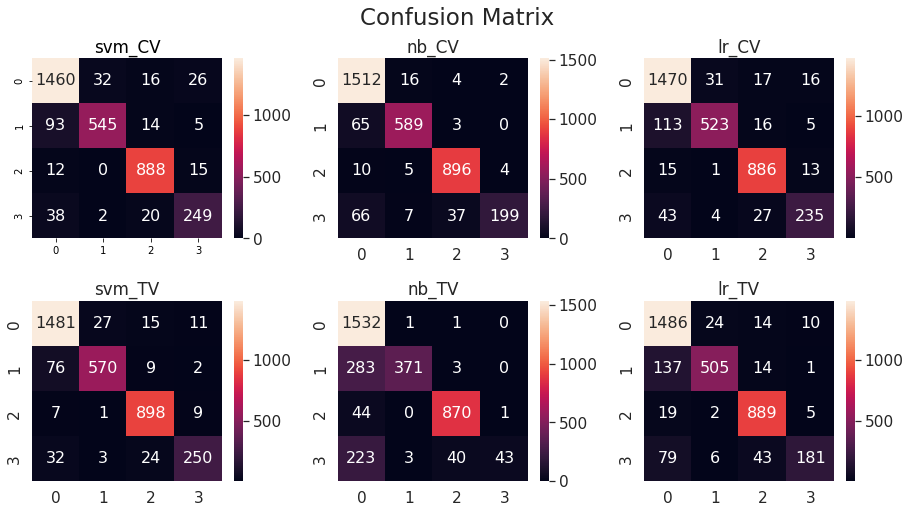

In [ ]:
f = plt.figure(figsize=(13, 7))
gs = f.add_gridspec(2, 3)

for i, mod in enumerate(cf):
  ax = f.add_subplot(gs[i - 2*(i//2), i//2])
  df_cm = pd.DataFrame(cf[mod], range(4), range(4))
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
  ax.set_title(mod)

plt.suptitle('Confusion Matrix', verticalalignment = 'bottom', fontsize = 23)
plt.tight_layout()

In [ ]:
table

,model,Accuracy,Precision,Recall,F1-score
0,svm_CV,92.005857,92.023953,92.005857,91.918861
1,svm_TV,93.674963,93.679625,93.674963,93.587107
2,nb_CV,93.587116,93.776331,93.587116,93.300884
3,nb_TV,82.459736,86.432966,82.459736,79.588915
4,lr_CV,91.185944,91.237161,91.185944,91.013580
5,lr_TV,89.633968,90.003380,89.633968,89.168673


**Nhận xét:**
- Với phương pháp mã hóa vector CountVectorizer, mô hình SVM cho kết quả tốt nhất trên cả 4 thang đo (93.67, 93.68, 93.67, 93.59)
- Với phương pháp mã hóa vector Tf-IdfVectorizer, mô hình Naive Baye cho kết quả tốt nhất trên cả 4 thang đo (93.59, 93.78, 93.59, 93.3)
- Hiệu năng của 2 mô hình SVM và Logistic Regression không chênh lệch quá nhiều khi sử dụng 2 phương pháp CountVectorizer và TF-IDF, tuy nhiên với Naive Bayes thì thay đổi đáng kể.

=> 2 mô hình tốt nhất là svm_TV và nb_CV (cả 2 có độ hiệu quả gần như tương đương nhau).

# **Machine Translation**
- Mô hình dịch máy chuyển từ tiếng Anh sang tiếng Việt
- Sử dụng mô hình Encoder-Decoder LSTM
- Vì giới hạn tài nguyên nên chỉ huấn luyện với lượng dữ liệu 4000 records.

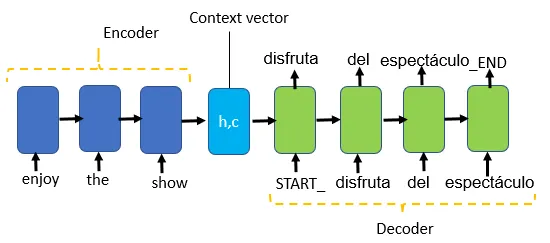

In [ ]:
trans_data = df.copy().iloc[:4000]
trans_data.drop('label', axis = 1, inplace = True)
trans_data

,data_type,vn_data,en_data
0,dev,( cũng gọi là bộ thanh nẹp ) một thanh nẹp châ...,( also called caliper splint ) a leg splint th...
1,dev,( còn gọi là bùng nổ ) một phương pháp dùng ch...,( also called implosion ) a method of treating...
2,dev,( sự hướng về ngoại giới ) một nét nhân cách b...,( extraversion ) an enduring personality trait...
3,dev,( u xơ tử cung ) một khối u lành của một mô cơ...,"( fibromyoma , uterine fibroma ) a bening tumo..."
4,dev,( từ cũ ) bất cứ dạng điều trị y học nào có dò...,( formerly ) any form of medical treatment usi...
...,...,...,...
3995,train,Một loại kháng huyết thanh có kháng thể chống ...,An antiserum containing antibodies against spe...
3996,train,Một loại thuốc kháng histamine dùng chủ yếu để...,An antithistamine drug used mainly to prevent ...
3997,train,Một loại thuốc chống vi rút nó ngăn cản sự tổ...,An antiviral drug that inhibits DNA synthesis ...
3998,train,"Một thuốc chống vi rút , có thể có tác động b...",An antiviral drug that probably acts by preven...


## Preprocessing
- Tiếng Anh:
  - Chuẩn hóa dấu câu
  - Chuyển chữ viết thường
- Tiếng Việt:
  - Chuẩn hóa unicode
  - Chuẩn hóa dấu câu tiếng Việt
  - Tách từ tiếng Việt
  - Chuyển chữ viết thường

In [ ]:
import unicodedata
from underthesea import text_normalize, word_tokenize

# Thêm token đánh dấu điểm bắt đầu và kết thúc của câu vào mỗi câu trong ngôn ngữ đích
eos = '<eos>'
bos = '<bos>'

en_input_tokenize = list()
for sentence in trans_data['en_data']:
  sentence = text_normalize(sentence)
  sentence = sentence.lower()
  en_input_tokenize.append(sentence.split())

vndata_pre = list()
vi_input_tokenize = list()
for sentence in trans_data['vn_data']:
  sentence = unicodedata.normalize('NFC', sentence)
  sentence = text_normalize(sentence)
  sentence = word_tokenize(sentence, format="text")
  sentence = sentence.lower()
  vi_input_tokenize.append([bos] + sentence.split() + [eos])

### Tạo bộ từ vựng

In [ ]:
from keras.preprocessing.text import Tokenizer

en_tokenizer = Tokenizer(oov_token = '<oov>')
en_tokenizer.fit_on_texts(en_input_tokenize)
en_vocabulary = en_tokenizer.word_index
en_size = len(en_vocabulary)
print(en_vocabulary)
print(en_size) # Số lượng từ có trong từ điển

vi_tokenizer = Tokenizer()
vi_tokenizer.fit_on_texts(vi_input_tokenize)
vi_vocabulary = vi_tokenizer.word_index
vi_size = len(vi_vocabulary)
print(vi_vocabulary)
print(vi_size) # Số lượng từ có trong từ điển

{'<oov>': 1, 'the': 2, 'a': 3, 'of': 4, '.': 5, ',': 6, 'in': 7, 'and': 8, 'to': 9, '(': 10, ')': 11, 'or': 12, 'that': 13, 'is': 14, 'by': 15, 'an': 16, 'which': 17, 'used': 18, '-': 19, 'from': 20, 'with': 21, 'as': 22, 'for': 23, 'drug': 24, 'blood': 25, 'see': 26, 'are': 27, 'skin': 28, 'disease': 29, 'body': 30, 'treat': 31, 'on': 32, 'cells': 33, 'such': 34, 'be': 35, 'at': 36, 'small': 37, 'one': 38, 'other': 39, 'part': 40, 'tissue': 41, 'into': 42, 'may': 43, 'form': 44, 'bone': 45, 'treatment': 46, 'caused': 47, 'cell': 48, 'condition': 49, 'usually': 50, 'muscle': 51, 'genus': 52, 'it': 53, 'has': 54, "'": 55, 's': 56, 'its': 57, 'heart': 58, 'abnormal': 59, 'bacteria': 60, 'containing': 61, 'but': 62, 'after': 63, 'mouth': 64, 'anatomy': 65, 'tumour': 66, 'tissues': 67, 'within': 68, 'some': 69, 'surgical': 70, 'patient': 71, 'group': 72, 'acid': 73, 'structure': 74, 'produced': 75, 'system': 76, 'can': 77, 'between': 78, 'surface': 79, 'due': 80, 'nerve': 81, 'eye': 82, 'n

In [ ]:
en_vocabulary_reverse = {}
for key, value in en_tokenizer.word_index.items():
  en_vocabulary_reverse[value] = key
en_vocabulary_reverse[0] = ''

vi_vocabulary_reverse = {}
for key, value in vi_tokenizer.word_index.items():
  vi_vocabulary_reverse[value] = key
vi_vocabulary_reverse[0] = ''

print(en_vocabulary_reverse)
print(vi_vocabulary_reverse)

{1: '<oov>', 2: 'the', 3: 'a', 4: 'of', 5: '.', 6: ',', 7: 'in', 8: 'and', 9: 'to', 10: '(', 11: ')', 12: 'or', 13: 'that', 14: 'is', 15: 'by', 16: 'an', 17: 'which', 18: 'used', 19: '-', 20: 'from', 21: 'with', 22: 'as', 23: 'for', 24: 'drug', 25: 'blood', 26: 'see', 27: 'are', 28: 'skin', 29: 'disease', 30: 'body', 31: 'treat', 32: 'on', 33: 'cells', 34: 'such', 35: 'be', 36: 'at', 37: 'small', 38: 'one', 39: 'other', 40: 'part', 41: 'tissue', 42: 'into', 43: 'may', 44: 'form', 45: 'bone', 46: 'treatment', 47: 'caused', 48: 'cell', 49: 'condition', 50: 'usually', 51: 'muscle', 52: 'genus', 53: 'it', 54: 'has', 55: "'", 56: 's', 57: 'its', 58: 'heart', 59: 'abnormal', 60: 'bacteria', 61: 'containing', 62: 'but', 63: 'after', 64: 'mouth', 65: 'anatomy', 66: 'tumour', 67: 'tissues', 68: 'within', 69: 'some', 70: 'surgical', 71: 'patient', 72: 'group', 73: 'acid', 74: 'structure', 75: 'produced', 76: 'system', 77: 'can', 78: 'between', 79: 'surface', 80: 'due', 81: 'nerve', 82: 'eye', 83

### Mã hóa

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

en_sequence = en_tokenizer.texts_to_sequences(en_input_tokenize)
enmaxlen = max([len(i) for i in en_sequence]) 
en_sequence = pad_sequences(en_sequence, maxlen = enmaxlen, padding = 'post')
print(en_sequence[0])

vi_sequence = vi_tokenizer.texts_to_sequences(vi_input_tokenize)
vimaxlen = max([len(i) for i in vi_sequence])
vi_sequence = pad_sequences(vi_sequence, maxlen = vimaxlen, padding = 'post')
print(vi_sequence[0])

[  10   98  306 3986 2229   11    3  737 2229   13  675    4  573 2797
  354    9    3 3987  738   36    2 1541    4    2  737    6  945    2
  850    4    2   30   18    9 3988 3989   32    3 1815   12 2798  737
   22   40    4 3990   46    5    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[   2    9  122  737  522 1129 1804   10    4 1129 1804  223   98   11
  547 1129  382  569 1805   53    4 2884   15 1806   12  223  167  964
   12   56   15 1130    5   17   14   20 1032    4  223   29  694   72
   29  485   22    6 1131  136 1132    1    3    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


## Prepare Data

In [ ]:
split_ratio = 0.9
split = round(len(vi_sequence)* split_ratio)
trainX = en_sequence[:split]
testX = en_sequence[split:]
trainY = vi_sequence[:split]
testY = vi_sequence[split:]

train_samples = len(trainX)
val_samples = len(testX)
batch_size = 128
epochs = 100 
latent_dim = 128

In [ ]:
from keras.utils import to_categorical
import numpy as np

def generate_batch(X, y, batch_size):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_input_data = []
      decoder_input_data = []
      decoder_target_data = []
      for (input_text, target_text) in (zip(X[j:j+batch_size], y[j:j+batch_size])):
        encoder_input_data.append(input_text)   
        decoder_input_data.append(target_text)
        decodertargetdata = to_categorical(target_text, num_classes=vi_size+1)[1:]
        decoder_target_data.append(np.concatenate((np.array(decodertargetdata), np.zeros((1, vi_size+1))), axis = 0))
      encoder_input_data = np.array(encoder_input_data)
      decoder_input_data = np.array(decoder_input_data)
      decoder_target_data = np.array(decoder_target_data)
      yield([encoder_input_data, decoder_input_data], decoder_target_data)

## Build Model

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

### Encoder

In [ ]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(en_size+1, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

### Decoder

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vi_size+1, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vi_size+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# Stop if no improvement after 5 epochs
early_stop_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

## Training

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['acc'])
model.fit(generate_batch(trainX, trainY, batch_size = batch_size),
          steps_per_epoch = train_samples//batch_size,
          validation_data = generate_batch(testX, testY, batch_size = batch_size),
          validation_steps = val_samples//batch_size,
          epochs=epochs,
          callbacks = [early_stop_callback]
          )

Epoch 1/100
28/28 [==============================] - 111s 4s/step - loss: 6.7282 - acc: 0.0607 - val_loss: 6.0436 - val_acc: 0.0778
Epoch 2/100
28/28 [==============================] - 89s 3s/step - loss: 5.9559 - acc: 0.0862 - val_loss: 5.9797 - val_acc: 0.0793
Epoch 3/100
28/28 [==============================] - 92s 3s/step - loss: 5.8403 - acc: 0.1138 - val_loss: 5.8772 - val_acc: 0.1134
Epoch 4/100
28/28 [==============================] - 93s 3s/step - loss: 5.6921 - acc: 0.1299 - val_loss: 5.7776 - val_acc: 0.1461
Epoch 5/100
28/28 [==============================] - 93s 3s/step - loss: 5.5838 - acc: 0.1662 - val_loss: 5.7139 - val_acc: 0.1824
Epoch 6/100
28/28 [==============================] - 101s 4s/step - loss: 5.4922 - acc: 0.1861 - val_loss: 5.6845 - val_acc: 0.1959
Epoch 7/100
28/28 [==============================] - 92s 3s/step - loss: 5.4213 - acc: 0.1953 - val_loss: 5.6313 - val_acc: 0.2018
Epoch 8/100
28/28 [==============================] - 92s 3s/step - loss: 5.3520 -

## Inference

In [ ]:
# Encode the input sequence to get the "Context vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_state_input)
decoder_states2 = [state_h2, state_c2]

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_state_input,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = vi_vocabulary[bos]

    # Sampling loop for a batch of sequences (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''

    # greedy search
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # print(output_tokens)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        sampled_word =vi_vocabulary_reverse[sampled_token_index]
        decoded_sentence += ' '+ sampled_word

        # Exit condition: either hit max length or find stop character.
        if (sampled_word == eos or
           len(decoded_sentence) > 100):
            stop_condition = True
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # Update states
        states_value = [h, c]
    return decoded_sentence

In [ ]:
test_gen = generate_batch(testX, testY, batch_size = 1)
(input_seq, actual_output), _ = next(test_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input Source sentence:', ' '.join([en_vocabulary_reverse[i] for i in input_seq[0]]))
print('Actual Target Translation:', ' '.join([vi_vocabulary_reverse[i] for i in actual_output[0]]))
print('Predicted Target Translation:', decoded_sentence)